In [12]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import random

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train = x_train/255
x_test = x_test/255

In [4]:
model = keras.Sequential([
keras.layers.Flatten(input_shape=(28,28)),
keras.layers.Dense(128, activation="relu"),
keras.layers.Dense(10, activation="softmax")    
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [5]:
model.compile(optimizer="sgd",
loss="sparse_categorical_crossentropy",
metrics=["accuracy"])

In [6]:
history=model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=11)

Epoch 1/11
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6357 - accuracy: 0.8419 - val_loss: 0.3532 - val_accuracy: 0.9057
Epoch 2/11
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3347 - accuracy: 0.9064 - val_loss: 0.2933 - val_accuracy: 0.9192
Epoch 3/11
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2871 - accuracy: 0.9204 - val_loss: 0.2597 - val_accuracy: 0.9293
Epoch 4/11
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2569 - accuracy: 0.9286 - val_loss: 0.2364 - val_accuracy: 0.9356
Epoch 5/11
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2339 - accuracy: 0.9342 - val_loss: 0.2173 - val_accuracy: 0.9399
Epoch 6/11
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2155 - accuracy: 0.9401 - val_loss: 0.2039 - val_accuracy: 0.9438
Epoch 7/11
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1998 - accuracy: 0.9445 - val_loss: 0.1907 - val_accuracy:

In [7]:
test_loss, test_acc=model.evaluate(x_test, y_test)
print("Loss=%.3f" %test_loss)
print("Accuracy=%.3f" %test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1550 - accuracy: 0.9548
Loss=0.155
Accuracy=0.955


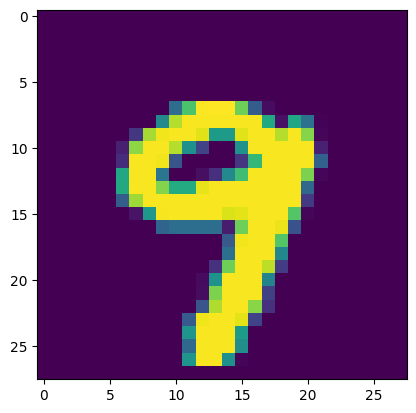

313/313 [==============================] - 1s 2ms/step


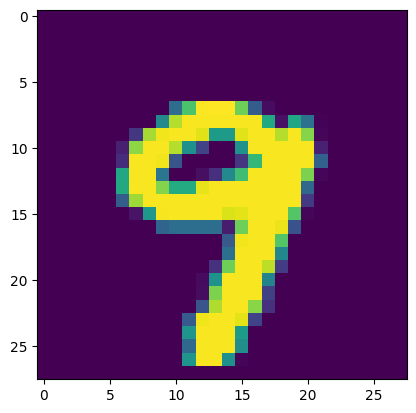

In [8]:
n=random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()
predicted_value=model.predict(x_test)
plt.imshow(x_test[n])
plt.show()

In [9]:
print('Predicted Value: ', predicted_value[n])

Predicted Value:  [1.1527442e-06 3.6382561e-09 2.4170669e-07 1.7015039e-04 1.6516679e-03
 1.0009969e-05 1.6051301e-08 2.1622514e-03 1.3739492e-04 9.9586713e-01]


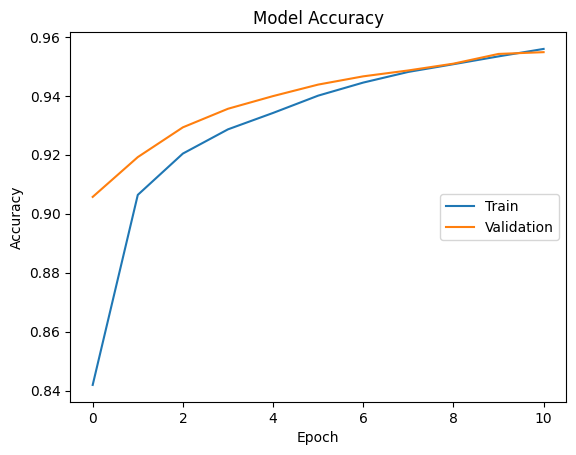

In [10]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='center right')
plt.show()

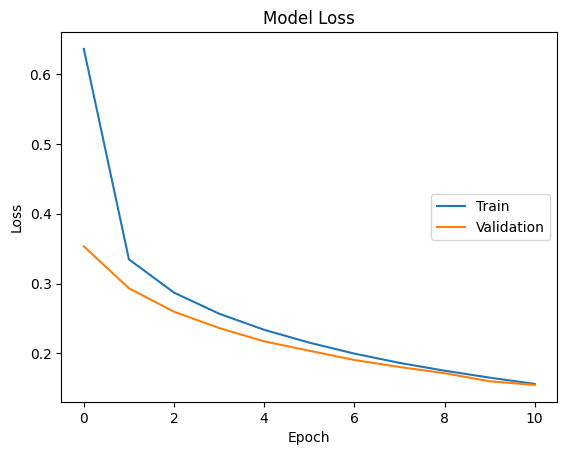

In [11]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='center right')
plt.show()